# SPEED DATING PROJECT

<img src= "https://storage.googleapis.com/kaggle-datasets-images/35/54/db837721caa77b658b81e24d97544dba/dataset-cover.jpg" alt="Speed Dating" width="100%" />







## Challenge description

This project is a data visualization and exploration project with a goal to extract some insights about love! Already a complicated subject, we are asked to understand what happens during a speed dating and especially to understand what will influence the obtaining of a second date. This is a Kaggle competition with more details on Kaggle.


---


## Goal
Let's try to produce visualisations that represent the dataset allowing to summarize some statistics as well as relationships between variables.

**Speed Dating Dataset**

It is neccessary to the description of the challenge and try to understand each of the variables in the dataset.

During the speed dating events, the attendees had a four minute "first date" with each participant of the opposite sex. Participants were then asked if they were up to seeing their speed date second time. They also rated their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests. The dataset also includes demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information.

**Data source**

The dataset also consists of questionnaires gathered from speed dating participants.

Data: https://www.kaggle.com/code/aeshen/the-secret-to-getting-the-second-date/data

Keys: https://www.kaggle.com/annavictoria/speed-dating-experiment#Speed%20Dating%20Data%20Key.doc

Note: Original data was compiled  from 2002-04 by professors of Columbia Business School: Ray Fisman and Sheena Iyengar for their paper Gender Differences in Mate Selection - Evidence From a Speed Dating Experiment. Link to the article:  https://doi.org/10.1162/qjec.2006.121.2.67



---


## Rendering

It is neccessary to do a *descriptive analysis of the main factors that influence getting a second appointment*.

**Data Exploration Ideas**

Questions tried to be answered in this notebook:

*  What is the demographics of women and men attending speed dating events? Are there any common background information in terms of race, income, city, age, etc.?

* Which personal traits and histories make a candidate more succesful in a dating event? Any gender specific findings?

* What are the most desirable attributes in speed-dating participants? What are the least ones?

* Do certain free time activities really help getting participants a date?

# 1 - SETUP AND LOADING DATABASE ☄

In [33]:
#Loading common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

import seaborn as sns #using it for heatmap and static figs

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None #The dataset is huge. To see all of the columns, we change max columns
pd.options.display.max_seq_items=1000
pd.options.display.max_rows=1000


In [34]:
#Loading database
fname1 = 'https://drive.google.com/file/d/1ZV6hTYIgCHQS06NylqOdlubhyUVOwv4y/view?usp=sharing'
fname1='https://drive.google.com/uc?id=' + fname1.split('/')[-2]
dataset = pd.read_csv(fname1)


In [35]:
dataset.shape

(8378, 195)

In [36]:
dataset.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace',
       'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun',
       'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o',
       'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field',
       'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace',
       'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out',
       'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
       'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1',
       'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1',
       'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1',
       'amb2_1', 'shar2_1', 'attr3_1', 'si

In [37]:
#let's overview data
dataset.head(5)

iid   id  gender  idg  condtn  wave  round  position  positin1  order  \
0    1  1.0       0    1       1     1     10         7       NaN      4   
1    1  1.0       0    1       1     1     10         7       NaN      3   
2    1  1.0       0    1       1     1     10         7       NaN     10   
3    1  1.0       0    1       1     1     10         7       NaN      5   
4    1  1.0       0    1       1     1     10         7       NaN      7   

   partner   pid  match  int_corr  samerace  age_o  race_o  pf_o_att  \
0        1  11.0      0      0.14         0   27.0     2.0      35.0   
1        2  12.0      0      0.54         0   22.0     2.0      60.0   
2        3  13.0      1      0.16         1   22.0     4.0      19.0   
3        4  14.0      1      0.61         0   23.0     2.0      30.0   
4        5  15.0      1      0.21         0   24.0     3.0      30.0   

   pf_o_sin  pf_o_int  pf_o_fun  pf_o_amb  pf_o_sha  dec_o  attr_o  sinc_o  \
0      20.0      20.0      20.0       0.0       5.0      0     6.0     8.0   
1       0.0       0.0      40.0       0.0       0.0      0     7.0     8.0   
2      18.0      19.0      18.0      14.0      12.0      1    10.0    10.0   
3       5.0      15.0      40.0       5.0       5.0      1     7.0     8.0   
4      10.0      20.0      10.0      10.0      20.0      1     8.0     7.0   

   intel_o  fun_o  amb_o  shar_o  like_o  prob_o  met_o   age field  field_cd  \
0      8.0    8.0    8.0     6.0     7.0     4.0    2.0  21.0   Law       1.0   
1     10.0    7.0    7.0     5.0     8.0     4.0    2.0  21.0   Law       1.0   
2     10.0   10.0   10.0    10.0    10.0    10.0    1.0  21.0   Law       1.0   
3      9.0    8.0    9.0     8.0     7.0     7.0    2.0  21.0   Law       1.0   
4      9.0    6.0    9.0     7.0     8.0     6.0    2.0  21.0   Law       1.0   

  undergra mn_sat tuition  race  imprace  imprelig     from zipcode  \
0      NaN    NaN     NaN   4.0      2.0       4.0  Chicago  60,521   
1      NaN    NaN     NaN   4.0      2.0       4.0  Chicago  60,521   
2      NaN    NaN     NaN   4.0      2.0       4.0  Chicago  60,521   
3      NaN    NaN     NaN   4.0      2.0       4.0  Chicago  60,521   
4      NaN    NaN     NaN   4.0      2.0       4.0  Chicago  60,521   

      income  goal  date  go_out  career  career_c  sports  tvsports  \
0  69,487.00   2.0   7.0     1.0  lawyer       NaN     9.0       2.0   
1  69,487.00   2.0   7.0     1.0  lawyer       NaN     9.0       2.0   
2  69,487.00   2.0   7.0     1.0  lawyer       NaN     9.0       2.0   
3  69,487.00   2.0   7.0     1.0  lawyer       NaN     9.0       2.0   
4  69,487.00   2.0   7.0     1.0  lawyer       NaN     9.0       2.0   

   exercise  dining  museums  art  hiking  gaming  clubbing  reading   tv  \
0       8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   
1       8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   
2       8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   
3       8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   
4       8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   

   theater  movies  concerts  music  shopping  yoga  exphappy  expnum  \
0      1.0    10.0      10.0    9.0       8.0   1.0       3.0     2.0   
1      1.0    10.0      10.0    9.0       8.0   1.0       3.0     2.0   
2      1.0    10.0      10.0    9.0       8.0   1.0       3.0     2.0   
3      1.0    10.0      10.0    9.0       8.0   1.0       3.0     2.0   
4      1.0    10.0      10.0    9.0       8.0   1.0       3.0     2.0   

   attr1_1  sinc1_1  intel1_1  fun1_1  amb1_1  shar1_1  attr4_1  sinc4_1  \
0     15.0     20.0      20.0    15.0    15.0     15.0      NaN      NaN   
1     15.0     20.0      20.0    15.0    15.0     15.0      NaN      NaN   
2     15.0     20.0      20.0    15.0    15.0     15.0      NaN      NaN   
3     15.0     20.0      20.0    15.0    15.0     15.0      NaN      NaN   
4     15.0     

In [38]:
print("\nCounting percentage of empty cells\n")
table_nullperc = dataset.isnull().sum()  / dataset.shape[0]
cols_filled = table_nullperc[table_nullperc < 0.40].index
print(table_nullperc.sort_values(ascending=False).head(20))


Counting percentage of empty cells

num_in_3    0.920267
numdat_3    0.821437
expnum      0.785152
sinc7_2     0.766651
amb7_2      0.766651
shar7_2     0.764383
attr7_2     0.763189
intel7_2    0.763189
fun7_2      0.763189
amb5_3      0.759370
attr7_3     0.759370
sinc7_3     0.759370
intel7_3    0.759370
fun7_3      0.759370
amb7_3      0.759370
shar7_3     0.759370
shar2_3     0.759370
attr5_3     0.759370
sinc5_3     0.759370
intel5_3    0.759370
dtype: float64


##**Let's Group Columns**

There are 195 columns. It is not easy to handle them so the columns are grouped below for easier work around.

In [39]:
#columns that will be needed
cols_useful = ['match', 'int_corr', 'exphappy', 'expnum','order']

#columns not useful 
cols_unuseful = ['iid', 'id','idg', 'condtn','wave', 'round', 'position',
                 'positin1','pid', 'partner']

#columns on demographic information of participant
cols_bground = ['gender', 'age', 'field', 'field_cd', 'undergra', 'mn_sat',
                'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 
                'income', 'goal' ]
              
#columns on information of match 
cols_partner = ['samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 
                'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 
                'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o',
                'like_o', 'prob_o', 'met_o',]

#first survey on hobbies of participant
cols_interest = ['date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 
                 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 
                 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 
                 'music', 'shopping', 'yoga']

#surveys completed before the event
cols_1_1 = ['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1' ] #columns on what you look for in the opposite sex
cols_4_1 = ['attr4_1','sinc4_1','intel4_1','fun4_1','amb4_1','shar4_1' ] #columns on what you think MOST of your fellow men/women look for in the opposite sex.
cols_2_1 = ['attr2_1','sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1' ] #columns on what you think the opposite sex looks for in a date
cols_3_1 = ['attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1' ] #columns on how you think you measure up 
cols_5_1 = ['attr5_1','sinc5_1','intel5_1','fun5_1','amb5_1' ] #columns on how you think others perceive you
cols_x_1 = [cols_1_1, cols_4_1, cols_5_1, cols_2_1, cols_3_1]
#we can use cols_3_1 can be used to define if a person is modest or over self esteem

#surveys completed during the event night
cols_1_s = ['attr1_s','sinc1_s','intel1_s','fun1_s','amb1_s','shar1_s' ] #columns on what you look for in the opposite sex
cols_3_s = ['attr3_s','sinc3_s','intel3_s','fun3_s','amb3_s'] #columns on how you think you measure up 
cols_x_s = [cols_1_s, cols_3_s] 

#follow-up surveys completed a day after /Time2:
cols_7_2 = ['attr7_2','sinc7_2','intel7_2','fun7_2','amb7_2','shar7_2' ] #columns on how important your reflections in your decisions
cols_1_2 = ['attr1_2','sinc1_2','intel1_2','fun1_2','amb1_2','shar1_2' ] #columns on what you look for in the opposite sex
cols_4_2 = ['attr4_2','sinc4_2','intel4_2','fun4_2','amb4_2','shar4_2' ] #columns on what you think MOST of your fellow men/women look for in the opposite sex.
cols_2_2 = ['attr2_2','sinc2_2','intel2_2','fun2_2','amb2_2','shar2_2' ] #columns on what you think the opposite sex looks for in a date
cols_3_2 = ['attr3_2','sinc3_2','intel3_2','fun3_2','amb3_2' ] #columns on how you think you measure up 
cols_5_2 = ['attr5_2','sinc5_2','intel5_2','fun5_2','amb5_2'] #columns on how you think others perceive you
cols_x_2 = [cols_7_2,cols_1_2, cols_4_2, cols_2_2, cols_3_2, cols_5_2]

#follow-up surveys completed 3-4 weeks after /Time3:
cols_7_3 = ['attr7_3','sinc7_3','intel7_3','fun7_3','amb7_3','shar7_3' ] #columns on how important your reflections in your decisions
cols_1_3 = ['attr1_3','sinc1_3','intel1_3','fun1_3','amb1_3','shar1_3' ] #columns on what you look for in the opposite sex
cols_4_3 = ['attr4_3','sinc4_3','intel4_3','fun4_3','amb4_3','shar4_3' ] #columns on what you think MOST of your fellow men/women look for in the opposite sex.
cols_2_3 = ['attr2_3','sinc2_3','intel2_3','fun2_3','amb2_3','shar2_3' ] #columns on what you think the opposite sex looks for in a date
cols_3_3 = ['attr3_3','sinc3_3','intel3_3','fun3_3','amb3_3'] #columns on how you think you measure up 
cols_5_3 = ['attr5_3','sinc5_3','intel5_3','fun5_3','amb5_3' ] #columns on how you think others perceive you
cols_x_3 = [cols_7_3,cols_1_3, cols_4_3, cols_2_3, cols_3_3, cols_5_3]

# 2 - DATA EXPLORATION ⚓

Let's get into data 

## **Part 1 - Univariate Exploration** ⛴

### With respect to gender

Gender distribution in dataset

Female    0.500597
Male      0.499403
Name: gender_, dtype: float64


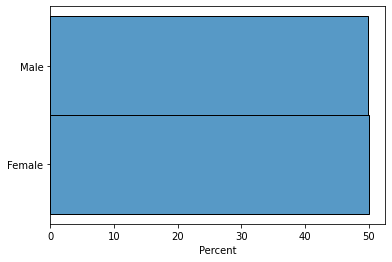

In [40]:
print("Gender distribution in dataset\n")
dataset['gender_'] = dataset['gender'].apply(lambda x: 'Female' if x == 1 else 'Male' )
print(dataset['gender_'].value_counts() / dataset.shape[0])

ax0= sns.histplot(dataset, y= 'gender_',stat='percent')
plt.setp(ax0,ylabel = '')
plt.show()

### With respect to match


Percentage of matched dates. 0 = Not matched. 1 = Matched. 

Not Matched    0.835283
Matched        0.164717
Name: match_, dtype: float64


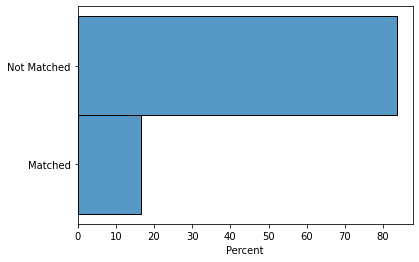

In [41]:
print('\nPercentage of matched dates. 0 = Not matched. 1 = Matched. \n')
dataset['match_'] = dataset['match'].apply(lambda x: 'Matched' if x == 1 else 'Not Matched' )
print(dataset.match_.value_counts()/ dataset.shape[0])

ax0= sns.histplot(dataset, y= 'match_',stat='percent', discrete=True)
plt.setp(ax0,ylabel = '')
plt.show()

### With respect to age

Age distribution of participants in dataset

count    8283.000000
mean       26.358928
std         3.566763
min        18.000000
25%        24.000000
50%        26.000000
75%        28.000000
max        55.000000
Name: age, dtype: float64



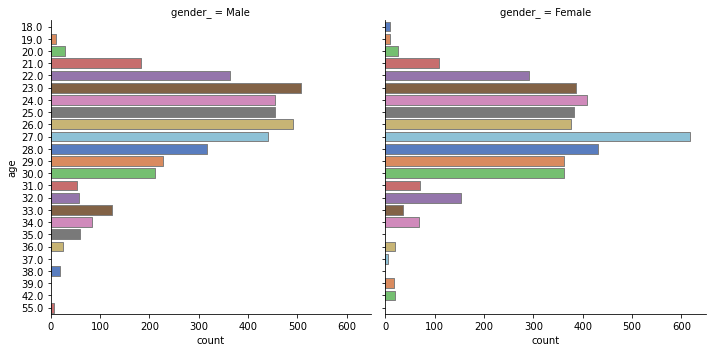

In [42]:
print("Age distribution of participants in dataset\n")
print(dataset['age'].describe())
print("")
sns.catplot(
    data=dataset, y="age", col="gender_", kind="count",
    palette="muted", edgecolor=".5")
plt.show()

### With respect to origin

Origin distribution in dataset

European/Caucasian-American              0.564216
Asian/Pacific Islander/Asian-American    0.236572
Latino/Hispanic American                 0.079255
Other                                    0.069826
Black/African American                   0.050131
Name: race_, dtype: float64


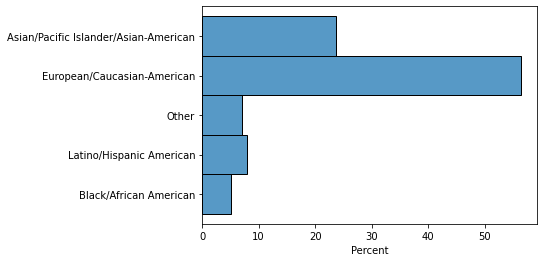

In [43]:
print("Origin distribution in dataset\n")
def race_l (x):
  if x == 1:
      y = 'Black/African American'
  elif x == 2:
      y = 'European/Caucasian-American'
  elif x == 3:
      y = 'Latino/Hispanic American'
  elif x == 4:
      y = 'Asian/Pacific Islander/Asian-American'
  elif x == 5:
      y = 'Native American'
  else:
     y = 'Other' 
  return(y)

dataset['race_'] = dataset['race'].apply(lambda x: race_l(x))
print(dataset['race_'].value_counts() / dataset.shape[0])

ax0= sns.histplot(dataset, y= 'race_',stat='percent')
plt.setp(ax0,ylabel = '')
plt.show()

### With respect to income

Estimated income distribution ($) in dataset

Values were based on zipcode using the US Census Bureau. 
No income means participants from abroad or missing zip code.

count      4279.000000
mean      44887.606450
std       17206.920962
min        8607.000000
25%       31516.000000
50%       43185.000000
75%       54303.000000
max      109031.000000
Name: income, dtype: float64


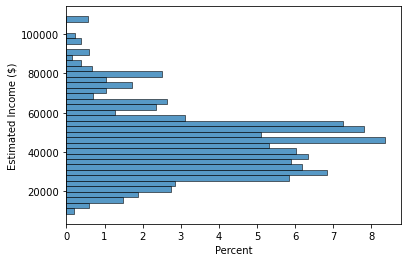

In [44]:
print("Estimated income distribution ($) in dataset\n")
print("Values were based on zipcode using the US Census Bureau. \nNo income means participants from abroad or missing zip code.\n")
dataset['income'] = dataset['income'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
print(dataset['income'].describe())
ax0= sns.histplot(dataset, y= 'income',  stat= 'percent')
plt.setp(ax0,ylabel = 'Estimated Income ($)')
plt.show()

### With respect to location

In [45]:
# ambitious effort below to correct country and state labels

def from_re (x):
  """
  Renaming by statename or country
  Emerging together abbrevated labels
  """
  if x in ny :
    y = 'new york'
  elif x in mass:
    y = 'massachusetts'
  elif x in cali:
    y = 'california'
  elif x in penns:
    y = 'pennsylvania'
  elif x in njersey:
    y = 'new jersey'
  elif x in uk: 
    y = 'uk'
  elif x in ga:
    y = ' georgia'
  elif x in dc:
    y = 'dc'
  elif x in india:
    y = 'india'
  elif x in dc:
    y = 'dc'  
  elif x in michigan:
    y = 'michigan'
  elif x in italy:
    y = 'italy'  
  elif x in fla:
    y = 'florida'  
  elif x in colarado:
    y = 'colarado'  
  elif x in taiwan:
    y = 'taiwan'  
  elif x in wisconsin:
    y = 'wisconsin'   
  elif x in maryland:
    y = 'maryland' 
  elif x in hongkong:
    y = 'hongkong'  
  elif x in china:
    y = 'china'  
  elif x in texas:
    y = 'texas'          
  elif x in iran:
    y = 'iran' 
  elif x in france:
    y = 'france'
  elif x in china:
    y = 'china'  
  elif x in ohio:
    y = 'ohio'          
  elif x in others:
    y = 'others' 
  elif x in canada:
    y = 'canada'    
  elif x in ohio:
    y = 'ohio'          
  elif x in others:
    y = 'others' 
  elif x in texas:
    y = 'texas'    
  else:
    y = x
  return y
  
ny = ['nyc', 'new york city', 'new york, ny', 'brooklyn, ny',
      'buffalo, ny', 'pougkeepsie ny', 'brooklyn', 'i am from nyc',
      'long island', 'new york area/ new jersey', 'long island, ny', 
      'nyc (staten island)','rochester, ny','ny','westchester, ny',
        'westchester county, n.y.','upstate new york', 'great neck, ny',
        'new york/south korea/japan', 'brooklyn ny', 'manhattan', 'queens',
      'staten island', 'new york city', 'katonah, ny (more recently, boston)',
      'westchester, new york'] #'new york'
mass = ['boston','boston, ma', 'cambridge, ma','malaysia, then massachusetts',
        'lexington, ma'] #'massachusetts'
cali = ['los angeles','los angeles, ca', 'san francisco', 'san diego',
        'southern california', 'northern california',  'san francisco bay area',
        'berkeley', 'san francisco(home)/los angeles(undergrad)',
        'sf bay area, ca', 'san francisco/la', 'saratoga, ny',
        'nyc, san francisco',  'san francisco, ca','palo alto, california', 
        'torrance, ca','california and new york', 'san diego, ca',
        'santa barbara, california','hawaii and los angeles',
        'california, new jersey','berkeley, ca','palo alto, ca',
        'california (west coast)','palm springs, california',] #'california'
penns = ['philadelphia', 'pa', 'pittsburgh','pittsburgh, pa', 'new hope, pa',
         'philadelphia, pa','erie, pa', 'philadelphia, pa', 'state college, pa'] #'pennsylvania'penns
njersey = ['nj', 'northern new jersey', 'south orange, new jersey' ] # 'new jersey'njersey
uk = ['london, england', 'london, uk', 'england', 'london & new york', 'uk/turkey','uk'] #'england' 'uk' england
ga = ['atlanta, ga','atlanta','georgia, usa'] #
dc = ['washington, dc', 'washington, d.c.', 'washington dc',
      'dc', 'wash dc (4 yrs)','washington dc metro region'] #DC dc
india = ['new delhi, india','india and nj','bombay, india','india, holland' ] #'india'india
michigan = ['ann arbor, mi','ann arbor','detroit, michigan, usa',  'michigan',
            'ann arbor, mi','minneapolis, mn'] #michigan
italy = [ 'milan, italy', 'genova, italy'] #'italy'
fla = ['miami', 'florida and virginia' ] #'florida', fla
colarado = ['boulder, colorado',] #'colorado',
taiwan = ['taipei, taiwan'] #
wisconsin = ['wisconsin','milwaukee, wisconsin' ]
maryland = ['baltimore',] #'maryland',
hongkong = ['hong kong', 'hkg']
china = ['china', 'beijing, china', 'shanghai, china','p. r. china',]
texas = ['austin, tx','texas/london']
iran = ['persia','born in iran']
france = [ 'paris','94115','france  / new york', ] #'france',
ohio = ['cincinnati, oh','cincinnati, ohio']
others = [ 'midwest usa', 'europe','uncc','j.p. morgan', 'working',  
          'international student', ]
canada = ['ottawa, canada','canada','toronto', 'toronto, canada', ]
michigan = ['detroit, michigan, usa',  'michigan','ann arbor, mi']
texas =['texas', 'houston', 'texas & boston','tokyo and texas','dallas, texas',
        'austin,tx']

dataset['from_'] = dataset['from'].str.lower().apply(lambda x:from_re(x) ) 

Location distribution of participants in dataset

15 most common states or countries in dataset

new york         1363
california        981
new jersey        504
massachusetts     297
pennsylvania      270
dc                225
china             203
texas             198
india             187
italy             176
uk                148
maryland          147
france            146
florida           141
taiwan            133
Name: from_, dtype: int64


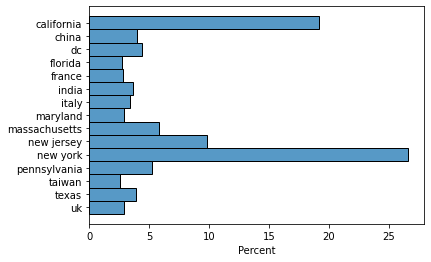

In [46]:
print("Location distribution of participants in dataset\n")
print("15 most common states or countries in dataset\n")
top_edu = dataset['from_'].value_counts()
print(top_edu.iloc[:15])
mask1 = dataset['from_'].isin ( top_edu.iloc[:15].keys())
ax0= sns.histplot(y = dataset.loc[mask1,'from_'].sort_values(), stat= 'percent')
plt.setp(ax0,ylabel = '')
plt.show()

### With respect to education

In [47]:
#Wrangling of university names registered in different manners
def underg_re (x):
  characters = ['university', 'college', 'the','at', ' of ',',','.','!','uc',
                'u ', '(',')', 'ecole', 'école']
  for ch in characters:
    x = x.replace('ž','e')
    x = x.replace(ch,'')
  return x.replace(' ','')

dataset['undergra_']=dataset['undergra'].astype(str).str.lower()
dataset['undergra_'] = dataset['undergra_'].apply(lambda x : underg_re(x))

Education distribution of participants in dataset

10 most common universities in dataset
columbia    182
harvard     174
berkeley    129
cornell     108
nyu          98
brown        96
yale         95
tufts        92
la           84
rutgers      66
Name: undergra_, dtype: int64


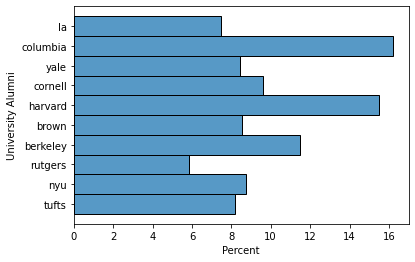

In [48]:
print("Education distribution of participants in dataset\n")
print("10 most common universities in dataset")
top_edu = dataset['undergra_'].value_counts()
print(top_edu.iloc[1:11])
mask1 = dataset['undergra_'].isin ( top_edu.iloc[1:11].keys())
ax0= sns.histplot(y = dataset.loc[mask1,'undergra_'], stat= 'percent')
plt.setp(ax0,ylabel = 'University Alumni')
plt.show()

### With respect to goal of participants


Goal distribution of participants


Keys on goals
	1 = Seemed like a fun night out
	2 = To meet new people
	3 = To get a date
	4 = Looking for a serious relationship
	5 = To say I did it
	6 = Other



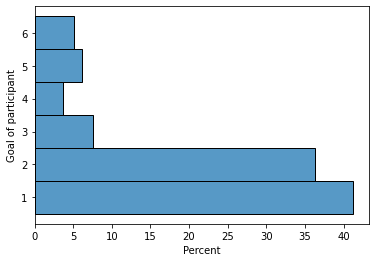

In [49]:
print('\nGoal distribution of participants\n')
print("""
Keys on goals
	1 = Seemed like a fun night out
	2 = To meet new people
	3 = To get a date
	4 = Looking for a serious relationship
	5 = To say I did it
	6 = Other
""")
ax0= sns.histplot(y = dataset['goal'], discrete=True,stat= 'percent')
plt.setp(ax0,ylabel = 'Goal of participant')
plt.show()

### **Observations**


1.   There is an equal distribution between male and female participants
2.   Most common participants are from the origins of European/Caucasian-American or Asian/Pacific Islander/Asian-American.
3.   Participants have an estimated income ranging from 31 500 to 54 400 $ between first and third quantiles. 
4.   Participants are mostly from California, New York and New Jersey.
5.   Participants attended at top-ranked or Ivy-league universities such as Colombia, Harvard, UC Berkeley and Cornell.

## Part 2 - Correspondance Matrix 🐠

Before going further in data exploration, let's identify most correlated characteristics for getting a second date.

In [50]:
print('\nTop 20 features for finding a second date\n')
corr_match=dataset[cols_filled].corr().loc[:,['match']].abs().sort_values(by='match',ascending=False)
corr_match.head(20)


Top 20 features for finding a second date



match
match     1.000000
dec_o     0.522326
dec       0.521943
like_o    0.305853
like      0.305723
fun_o     0.277700
fun       0.277545
shar_o    0.270840
shar      0.270679
attr_o    0.260837
attr      0.260676
prob_o    0.255574
prob      0.255531
intel     0.169532
intel_o   0.169448
sinc_o    0.164523
sinc      0.164449
amb       0.140042
amb_o     0.139927
match_es  0.130592

**Explanation of parameters correlated to a second date**

* 'match': matching or not on a speed-date event [1=yes, 0=no]
* 'dec_o' and 'dec': decision on the night of event [0= No; 1= Yes]
* 'like_o' and 'like': how much do you like this person. responded on the night of event [1=don't like at all, 10=like a lot]
* 'fun_o' and 'fun': rate on how fun is s/he. responded on the night of event [1=awful, 10=great]
* 'shar_o' and 'shar': shared interests/hobbies. responded on the night of event [1=awful, 10=great]
* 'attr_o' and 'attr': rate on how attractive is s/he. responded on the night of event [1=awful, 10=great]
* 'prob_o' and 'prob': rate on how probable of him/her saying 'yes' for you? responded on the night of event [1=awful, 10=great]
* 'intel' and 'intel_o': : rate on how intelligent is s/he? responded on the night of event [1=awful, 10=great]
* 'sinc_o' and 'sinc':  rate on how intelligent is s/he? responded on the night of event [1=awful, 10=great]
* 'expnum': Out of the 20 people you will meet, how many do you expect will be interested in dating you? responded before the event.
* 'amb' and 'amb_o': rate on how ambitious is s/he? responded on the night of event [1=awful, 10=great]
* 'match_es': question on how many matches do you estimate you will get ? responded before the event.

Correspondance matrix of top correlated features



<AxesSubplot:>

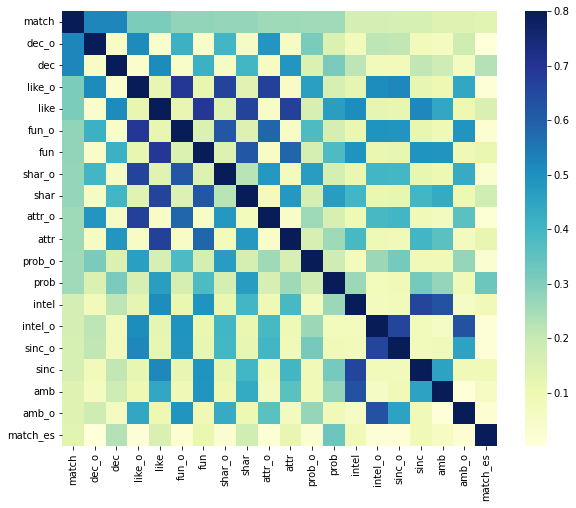

In [51]:
print("Correspondance matrix of top correlated features\n")
key_cols = corr_match.head(20).index #first 20 columns correlated to matches
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(dataset[key_cols].corr().abs(), vmax=.8, square=True,  cmap="YlGnBu")

### Observations

We observe that

1.   Matching is highly correleated to personality attributes. 
2.   Attributes that are colinear for getting a second date are listed below: 
  
    likability > fun > shared interests/hobbies > attractiveness > intelligence > sincerity > ambition
3.   Decision (saying Yes) of participants is colinear with the sum of those attributes : 
    likability >  attractiveness > fun > shared interests/hobbies > intelligence > sincerity > ambition

    Attractiveness is not the most correlated parameter on a participant's decision. Surprising, huh?
4.   Two groups of personal traits are visible. They show colinearity within the groups below: 

   Group a. Likeability, funny, sharing interests/hobbies and attractiveness 

   Group b. Intelligence, sincerity and ambition. 

## Part 3 - Bivariate Exploration 🐬

### Matches with respect to origin

In [52]:
print('\nAre there any links between origin of participant and matches?\n')
print("""
Keys on origins:
	1.0 = Black/African American
	2.0 = European/Caucasian-American
	3.0 = Latino/Hispanic American
	4.0 = Asian/Pacific Islander/Asian-American
	5.0 = Native American
	6.0 = Other
""")
dataset.loc[:,['match','race']].groupby(by='race') \
       .agg({'race':'count', 'match':'mean'}) \
       .rename(columns={'race':'count','match':'match_mean'}) \
       .sort_values(by='match_mean',ascending=False)


Are there any links between origin of participant and matches?


Keys on origins:
	1.0 = Black/African American
	2.0 = European/Caucasian-American
	3.0 = Latino/Hispanic American
	4.0 = Asian/Pacific Islander/Asian-American
	5.0 = Native American
	6.0 = Other



count  match_mean
race                   
1.0     420    0.202381
6.0     522    0.197318
3.0     664    0.185241
2.0    4727    0.166702
4.0    1982    0.134712

### Matches with respect to being outgoing

In [53]:
print('\nAre there any links between being outgoing and more matches?\n')
print("""
How often do you go out (not necessarily on dates)?
	1.0 = Several times a week
	2.0 = Twice a week
	3.0 = Once a week
	4.0 = Twice a month
	5.0 = Once a month
	6.0 = Several times a year
	7.0 = Almost never
	""")

dataset.loc[:,['match','go_out']].groupby(by='go_out')\
       .agg({'go_out':'count', 'match':'mean'}) \
       .rename(columns={'go_out':'count','match':'match_mean'}) \
       .sort_values(by='match_mean',ascending=False)


Are there any links between being outgoing and more matches?


How often do you go out (not necessarily on dates)?
	1.0 = Several times a week
	2.0 = Twice a week
	3.0 = Once a week
	4.0 = Twice a month
	5.0 = Once a month
	6.0 = Several times a year
	7.0 = Almost never
	


count  match_mean
go_out                   
1.0      2610    0.194253
2.0      2990    0.160201
3.0      1949    0.148281
6.0        99    0.131313
4.0       450    0.126667
5.0       164    0.115854
7.0        37    0.027027

### Matches with respect to field of study

In [54]:
print('\nAre there any links between field of study of participants and matches?\n')
index_ = {1: 'Law',  
    2: 'Math',
    3: 'Social Science, Psychologist',
    4: 'Medical Science, Pharmaceuticals, and BioTech', 
    5: 'Engineering',
    6: 'English/Creative Writing/ Journalism', 
    7: 'History/Religion/Philosophy', 
    8: 'Business/Econ/Finance', 
    9: 'Education, Academia',
    10:'Biological Sciences/Chemistry/Physics',
    11: 'Social Work',
    12: 'Undergrad/undecided',
    13: 'Political Science/International Affairs',
    14: 'Film',
    15: 'Fine Arts/Arts Administration',
    16: 'Languages',
    17: 'Architecture',
    18: 'Other'}
dataset.loc[:,['match','field_cd']].groupby(by='field_cd')\
       .agg({'field_cd':'count', 'match':'mean'}) \
       .rename(columns={'field_cd':'count','match':'match_mean'}) \
       .rename(index=index_) \
       .sort_values(by='match_mean',ascending=False)


Are there any links between field of study of participants and matches?



count  match_mean
field_cd                                                        
Medical Science, Pharmaceuticals, and BioTech    143    0.321678
Languages                                         40    0.300000
Law                                              665    0.204511
Social Science, Psychologist                     696    0.183908
Film                                             126    0.182540
Business/Econ/Finance                           1925    0.175584
Political Science/International Affairs          709    0.167842
History/Religion/Philosophy                      241    0.165975
Biological Sciences/Chemistry/Physics            993    0.162135
Other                                             52    0.153846
Education, Academia                              626    0.151757
English/Creative Writing/ Journalism             325    0.147692
Engineering                                      864    0.135417
Fine Arts/Arts Administration                    187    0.117647
Social Work                                      468    0.106838
Math                                             207    0.101449
Architecture                                      10    0.100000
Undergrad/undecided                               19    0.052632

### Matches with respect to intended career

In [55]:
print('\nAre there any links between career of participants and matches?\n')
index_ = {1: 'Lawyer',
    2: 'Academic/Research',
    3: 'Psychologist', 
    4: 'Doctor/Medicine', 
    5: 'Engineer', 
    6: 'Creative Arts/Entertainment',
    7: 'Banking/Consulting/Finance/...', 
    8:'Real Estate' ,
    9:'International/Humanitarian Affairs' ,
    10:'Undecided',
    11: 'Social Work',
    12: 'Speech Pathology',
    13: 'Politics',
    14: 'Pro-sports/Athletics',
    15: 'Other',
    16: 'Journalism',
    17: 'Architecture'}
dataset.loc[:,['match','career_c']].groupby(by='career_c')\
       .agg({'career_c':'count', 'match':'mean'}) \
       .rename(columns={'career_c':'count','match':'match_mean'}) \
       .rename(index=index_) \
       .sort_values(by='match_mean',ascending=False)


Are there any links between career of participants and matches?



count  match_mean
career_c                                             
Pro-sports/Athletics                   10    0.300000
Psychologist                          261    0.206897
Lawyer                                675    0.198519
Journalism                             44    0.181818
Banking/Consulting/Finance/...       2170    0.179724
Other                                  77    0.168831
Doctor/Medicine                       421    0.166271
Social Work                           220    0.159091
Creative Arts/Entertainment           724    0.158840
Academic/Research                    2320    0.155172
Engineer                              234    0.153846
International/Humanitarian Affairs    547    0.144424
Real Estate                            39    0.128205
Undecided                             379    0.126649
Architecture                           10    0.100000
Politics                               81    0.074074
Speech Pathology                       28    0.035714

### Matches with income

In [56]:
print('\nAre there any links between income of participant and matches?\n')
print("""
Income was divided in five intervals having equivalent data amount:
    (55550.0, 109031.0] = Between 55 550 $ and 109 031 $
    (47572.0, 55550.0]  = Between 47 572 $ and 55 550 $
    (38832.0, 47572.0]  = Between 38 832 $ and 47 572 $
    (30038.0, 38832.0]  = Between 30 038 $ and 38 832 $
    (8606.999, 30038.0] = Between 8 606 $ and 30 038 $
""")
dataset['income_cat']= dataset['income'].apply(lambda x : str(x).replace(',', '')).astype(float) #move to data editing
dataset['income_cat'] =  pd.qcut(dataset['income_cat'], 5)
dataset.loc[:,['match','income_cat']].groupby(by='income_cat') \
       .agg({'income_cat':'count', 'match':'mean'}) \
       .rename(columns={'income_cat':'count','match':'match_mean'}) \
       .sort_values(by='match_mean',ascending=False)


Are there any links between income of participant and matches?


Income was divided in five intervals having equivalent data amount:
    (55550.0, 109031.0] = Between 55 550 $ and 109 031 $
    (47572.0, 55550.0]  = Between 47 572 $ and 55 550 $
    (38832.0, 47572.0]  = Between 38 832 $ and 47 572 $
    (30038.0, 38832.0]  = Between 30 038 $ and 38 832 $
    (8606.999, 30038.0] = Between 8 606 $ and 30 038 $



count  match_mean
income_cat                            
(55550.0, 109031.0]    847    0.205431
(47572.0, 55550.0]     864    0.174769
(8606.999, 30038.0]    877    0.165336
(30038.0, 38832.0]     850    0.163529
(38832.0, 47572.0]     841    0.151011

### Observations

We observe that

*   There are certain background information that seems to increase the second date chances. 
*   Participants of African American descendants had the most matches. Participants of Asian/Pacific Islander/Asian-American origin had the least matches.
*   Participants that go out frequently (more than once a week) had the most matches.
*   Participants studied medical science, pharmaceuticals, biotech, languages and law had the most matches. Whereas, participants with a degree on social work, fine arts and engineering had the least matches.
*   Participants working as a psychologist, a lawyer or in finance have the most matches. Participants working in politics, real estate and international affairs had the least matches.

## Part 4 - Multivariate Comparisons 🌊

Figure - Tracing matches versus age and race



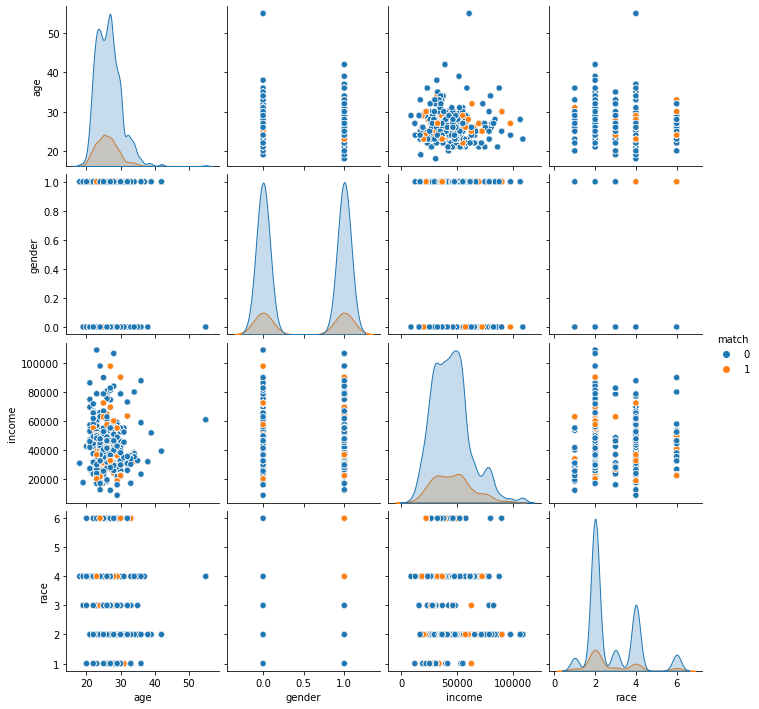

In [57]:
#let's check the demographics of speed dating participants together
print("Figure - Tracing matches versus age and race\n")
cols_ = ['age','gender','income','race','match']
df = dataset[cols_]
sns.pairplot(df,hue='match')


Saying Yes or No? Numbers of participants said Yes by gender?

Percentage of participants saying Yes by gender

gender_
Female     56.537806
Male       43.462194
dtype: float64
Figure - Participant saying Yes by gender



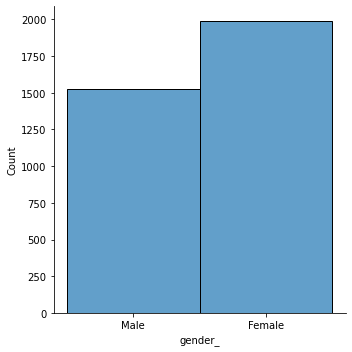

In [58]:
print('\nSaying Yes or No? Numbers of participants said Yes by gender?\n')

mask1 = dataset['dec'] == 1
print('Percentage of participants saying Yes by gender\n')
print(100*dataset.loc[mask1,['gender_']].value_counts()/mask1.sum())
print('Figure - Participant saying Yes by gender\n')
sns.displot(data = dataset.loc[mask1,:],
            #x = 'dec',
            alpha = .7,
            x = 'gender_',
            discrete= True
            )

In [60]:
dataset['match_es_'] = 10.*dataset['match_es']/dataset["match_es"].max()

In [61]:
print("Figure - Average scores on personal traits by matched and non matched profiles\n")
#let's normalize match numbers from 0 to 10
dataset['match_es_'] = 10.*dataset['match_es']/dataset["match_es"].max()
fig = px.box(dataset.loc[:,:], y=['like','fun','shar','attr','intel','sinc','amb', 'match_es_'],
             color='match', boxmode='group')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

Figure - Average scores on personal traits by matched and non matched profiles



In [62]:
print("Table - Average scores on personal traits given by matched profiles")
mask1 = dataset['match'] ==1 #matched cases
cols2= ['like','fun','shar','attr','intel','sinc','amb','match_es_','gender_']
gender_p2 = dataset.loc[mask1,cols2].groupby('gender_').mean()
gender_p2.columns = ['likeability','fun','shared_interests',
                    'attractiveness','intelligence', 'sincerity','ambition',
                    'estimated match number_norm10',]
gender_p2

Table - Average scores on personal traits given by matched profiles


likeability       fun  shared_interests  attractiveness  \
gender_                                                            
Female      7.425254  7.552786          6.654874        7.520319   
Male        7.338428  7.644217          6.854167        7.118459   

         intelligence  sincerity  ambition  estimated match number_norm10  
gender_                                                                    
Female       7.825292   7.798246  7.183409                       2.214683  
Male         8.075073   7.820700  7.485271                       2.166667

In [63]:
print("Figure - Average scores on personal traits of matched profiles noted down by gender\n")
fig = px.box(dataset.loc[mask1,:], y=['like','fun','shar','attr','intel','sinc','amb', 'match_es_'], color='gender_', boxmode='group')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

Figure - Average scores on personal traits of matched profiles noted down by gender



Figure - Any correlation between hobbies and matches?

On the left, non-matched profiles. 	On the right, matched profiles.



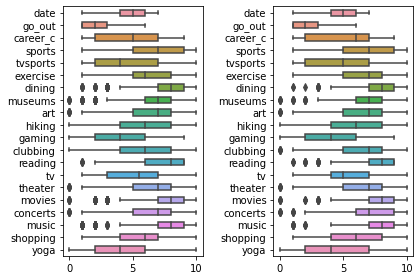

In [64]:
print("Figure - Any correlation between hobbies and matches?\n")
print("On the left, non-matched profiles. \tOn the right, matched profiles.\n")
mask1 = dataset['match'] ==1 #matched cases
mask_a = dataset['career_c'] <10. #removing pts >10
mask_b = dataset['gaming'] <10. #removing pts >10
mask_c = dataset['reading'] <10. #removing pts >10
mask_ = mask_a & mask_b & mask_c
f, axes = plt.subplots(1, 2)
# not matched profiles
sns.boxplot( data = dataset.loc[~mask1 & mask_,cols_interest], orient ='h', width=0.5 , ax=axes[0])
# matched profiles
sns.boxplot( data = dataset.loc[mask1 & mask_,cols_interest ], orient ='h',width=0.5  , ax=axes[1])
f.tight_layout()

We can highlight that

* Matched participants had highest scores on fun, intelligence and sincerity. These are the three most import criteria to get a second date.

* Non-matched participants had the lowest scores on shared interest, fun, attractiveness and likability. They may need to start new hobbies to invest in, learn fun stories to tell and find personal styles that go better with them. Matched candiates are more optimist to get a second date.

* Males' and females' scorings look similar when it comes to likeability, shared interest, intelligence and sincerity. Male participants gave much less points on attractiveness than female participants. Females gave much less points on fun and ambition than their partners.

* Females said Yes 13% more often males. Males seem to decrease the match rates in the events.

* There is not much correlation between hobbies and matches. Only exceptions are clubbing and reading. Clubbers and avid readers seem to obtain a second date more often.

* Overall, there is also a good number of participants left the event heartbroken or failed estimating partner's feeling.


# 3- SUMMARY 🔎

In this notebook, a descriptive analysis has been carried out to identify the patterns influencing a second date appointment.

Here are the key findings:

1. What is the demographics of women and men attending speed dating events? Are there any common points in terms of race, income, city, age, etc.?

> Most participants come from the European descendant or Asian origin. Their income mostly ranges from 31 500 to 54 400 $. They live in California, New York or New Jersey and they studied at top-ranked or Ivy-league universities such as Colombia, Harvard, UC Berkeley and Cornell. These particular patterns in the dataset make me question if the observations here can be generalized over other categories not sufficiently represented here or not.*

2. Which personal traits and background make a candidate more succesful in a dating business? Any gender specific findings?

> Likeable, fun, persons with shared interests/hobbies

> Going out frequently (more than once a week),

> Having studied in certain domains (medical science, pharmaceuticals, biotech, languages and law) 

> Working as a psychologist, a lawyer or in finance

> Being from  African American descendant


3. What are the most desirable attributes in participants? What are the least ones?

> Fun, intelligent and sincere people got more second dates.

> Non-matched participants had the lowest scores on shared interest, fun, attractiveness and likability.

4. Do hobbies really help getting a date?

> Except for people who go to clubs and read more often. They had relatively more success on getting a second date.

End of notebook
# END